In [1]:
# checks if the montecarlo simulation generates the same distribution as a manufactured event log for complex example

import pm4py
from pm4py import write_xes as xes
from pm4py.objects.log.obj import EventLog, Trace
from datetime import datetime, timedelta
import numpy as np
import pm4py.algo.simulation.montecarlo as monte
from pm4py.algo.simulation.montecarlo import algorithm as montecarlo_simulation
from pm4py.algo.conformance.tokenreplay.algorithm import Variants
import pandas as pd
import random

random.seed(2023)
np.random.seed(2023)

/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/pm4py/objects/random_variables/__init__.py:23: UserWarning: The random_variables package will be removed in a future release.
  warnings.warn("The random_variables package will be removed in a future release.")
/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/pm4py/objects/stochastic_petri/__init__.py:23: UserWarning: The stochastic_petri package will be removed in a future release.
  warnings.warn("The stochastic_petri package will be removed in a future release.")
/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/pm4py/algo/simulation/montecarlo/__init__.py:24: UserWarning: The simulation.montecarlo package will be removed in a future release.
  warnings.warn("The simulation.montecarlo package will be removed in a future release.")


In [2]:
# generating complex Petri net structure

# Function to generate timestamps based on an exponential distribution
def generate_timestamps(num_events, num_traces, lambda_value):
    total_timestamps = num_events*num_traces
    timestamps = [timedelta(seconds=np.random.exponential(1/lambda_value)) for _ in range(total_timestamps)]
    return timestamps

# Generate event names and timestamps based on the exponential distribution
event_names = ["event b", "event c", "event d"]  # Example event names
num_events = 10  # Number of events to generate
num_traces = 5
lambda_value = 0.1  # Lambda value for exponential distribution

timestamps = generate_timestamps(num_events, num_traces, lambda_value)

# Create a synthetic event log
# a=1
log = EventLog()
# trace = Trace()
# trace.attributes["concept:name"] = str(a)


# k=0

# prev_name=''
# for j in range(num_traces):
#     current_time = datetime(2023, 1, 1)
#     for i in range(num_events):
#         current_time += timestamps[i]

#         name = np.random.choice(event_names)
#         while prev_name==name:
#             name = np.random.choice(event_names)

#         event = {
#             'concept:name': name,
#             'time:timestamp': pd.Timestamp(current_time),
#             'Activity': name
#         }

#         if k==0:
#             name = 'event a'
            
#         if k==8:
#             name = "decide"
            
#         if k==9:
#             name = np.random.choice(["event e", "event f"])
            
#         trace.insert(k, event)
#         k=k+1

#         if k == 10:
#             a = a+1
#             log.append(trace)
#             trace = Trace()
#             trace.attributes["concept:name"] = str(a)
#             k=0
#         prev_name = name

log = EventLog()
trace = Trace()
a=0
prev_name = ''
current_time = datetime(2023, 1, 1)
for j in range(num_traces):
    trace = Trace()
    for i in range(num_events):
        current_time += timestamps[a]

        name = np.random.choice(event_names)
        while prev_name==name:
            name = np.random.choice(event_names)

        if i==0:
            name = 'event a'
            
        if i==8:
            name = "decide"
            
        if i==9:
            name = np.random.choice(["event e", "event f"])


        event = {
            'concept:name': name,
            'time:timestamp': pd.Timestamp(current_time),
            'Activity': name
        }
        trace.insert(i, event)
        a=a+1
        prev_name = name
    log.append(trace)




pm4py.write_xes(log, "/Users/ethanjohnson/Desktop/mphil-project/processed_data/disttest_complex.xes")

for trace in log:
    print(len(trace))


# dfg_perf, sa, ea = pm4py.discover_performance_dfg(log)
# net, im, fm = pm4py.convert_to_petri_net(dfg_perf, sa, ea)



/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/pm4py/utils.py:537: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
exporting log, completed traces :: 100%|██████████| 5/5 [00:00<00:00, 4244.39it/s]

10
10
10
10
10


In [61]:
# Extract timestamps from the event log
timestamps = []
for trace in log:
    for event in trace:
        timestamps.append(event['time:timestamp'])  # Assuming 'time:timestamp' is the timestamp attribute

# Calculate time differences (durations) between consecutive events
durations = []
for i in range(1, len(timestamps)):
    time_diff = timestamps[i] - timestamps[i - 1]
    durations.append(time_diff.total_seconds())

# Calculate statistics or analyze the durations
mean_duration = np.mean(durations)
median_duration = np.median(durations)
std_deviation = np.std(durations)

print(f"Mean Duration: {mean_duration} seconds")
print(f"Median Duration: {median_duration} seconds")
print(f"Standard Deviation: {std_deviation} seconds")



Mean Duration: 1.4950979285714285 seconds
Median Duration: 3.7129185000000002 seconds
Standard Deviation: 14.440566304817104 seconds


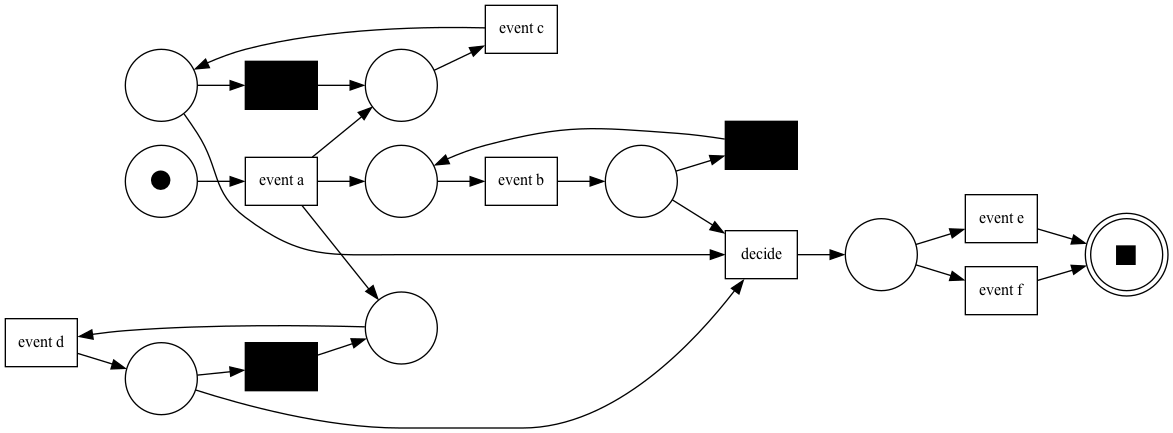

In [3]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
net, im, fm = pm4py.discover_petri_net_inductive(log)

gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [5]:

parameters={}
#montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.TOKEN_REPLAY_VARIANT] = Variants.BACKWARDS
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_MAX_THREAD_EXECUTION_TIME] = 1000
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_MAP_RESOURCES_PER_PLACE] = {
    'event a': 10000,  
    'event b': 10000,  
    'event c': 10000,
    'event d': 10000,
    'decide': 10000,
    'event e': 10000,
    'event f': 10000
}

parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_NUM_SIMULATIONS] = num_traces

simulated_log, res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)

pm4py.write_xes(simulated_log, "/Users/ethanjohnson/Desktop/mphil-project/processed_data/simtest_complex.xes")

for trace in simulated_log:
    print(len(trace))



INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697825.8590138 started the replay operation.
replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 1429.75it/s]
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697825.882814 ended the replay operation.
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697841.397703 diagnostics for thread 0: blocked places by semaphore: {p_9: 0, p_14: 0, p_15: 0, p_10: 0, source: 0, p_20: 0, p_19: 0}
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697841.3985379 diagnostics for thread 1: blocked places by semaphore: {p_9: 0, p_14: 0, p_15: 0, p_10: 0, source: 0, p_20: 0, p_19: 0}
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697841.3987358 diagnostics for thread 2: blocked places by semaphore: {p_9: 0, p_14: 0, p_15: 0, p_10: 0, source: 0, p_20: 0, p_19: 0}
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:17016

11
8
11
12
7


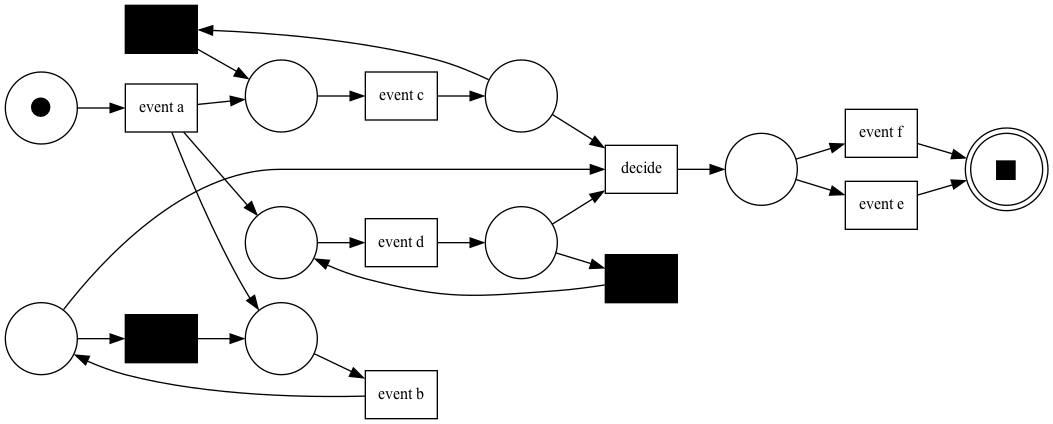

In [6]:
simnet, simim, simfm = pm4py.discover_petri_net_inductive(simulated_log)

gviz = pn_visualizer.apply(simnet, simim, simfm)
pn_visualizer.view(gviz)

In [48]:
timestamps = []
for trace in simulated_log:
    for event in trace:
        timestamps.append(event['time:timestamp']) 

# Calculate time differences (durations) between consecutive events
durations = []
for i in range(1, len(timestamps)):
    time_diff = timestamps[i] - timestamps[i - 1]
    durations.append(time_diff.total_seconds())

mean_duration = np.mean(durations)
median_duration = np.median(durations)
std_deviation = np.std(durations)



print(f"Mean Duration sim: {mean_duration} seconds")
print(f"Median Duration sim: {median_duration} seconds")
print(f"Standard Deviation sim: {std_deviation} seconds")



Mean Duration sim: 5.429212285714286 seconds
Median Duration sim: 7.5959315 seconds
Standard Deviation sim: 51.31843990688926 seconds


Summary Statistics for Generated Log Time Differences:
count    49.000000
mean      8.483292
std       8.660168
min       0.223373
25%       2.274798
50%       5.298573
75%      10.885258
max      39.402798
dtype: float64

Summary Statistics for Simulated Log Time Differences:
count    48.000000
mean      9.865250
std      10.244635
min       0.000000
25%       2.316801
50%       7.801445
75%      12.636379
max      42.625041
dtype: float64


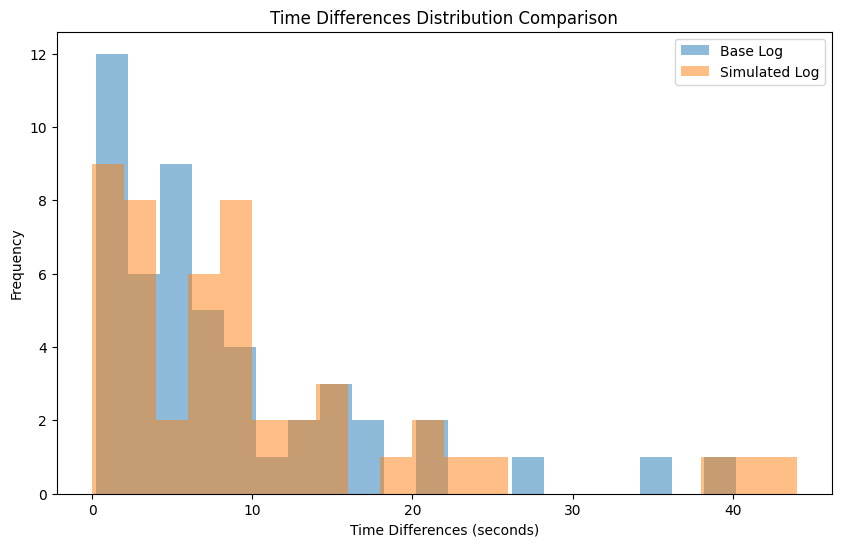

Kolmogorov-Smirnov Test p-value: 0.3812823001600551


In [7]:

from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Load event logs
log1 = log  # Replace 'log1.xes' with your file
log2 = simulated_log  # Replace 'log2.xes' with your file

# Extract timestamps from event logs
timestamps_log1 = [event['time:timestamp'] for trace in log1 for event in trace]
timestamps_log2 = [event['time:timestamp'] for trace in log2 for event in trace]

timestamps_log1.sort()
timestamps_log2.sort()

# Compute time differences
time_diff_log1 = [(timestamps_log1[i + 1] - timestamps_log1[i]).total_seconds()
                  for i in range(len(timestamps_log1) - 1)]
time_diff_log2 = [(timestamps_log2[i + 1] - timestamps_log2[i]).total_seconds()
                  for i in range(len(timestamps_log2) - 1)]



# Summary statistics
print("Summary Statistics for Generated Log Time Differences:")
print(pd.Series(time_diff_log1).describe())

print("\nSummary Statistics for Simulated Log Time Differences:")
print(pd.Series(time_diff_log2).describe())

w = 2
# Visualization - Histograms
plt.figure(figsize=(10, 6))
plt.hist(time_diff_log1, bins=np.arange(min(time_diff_log1), max(time_diff_log1) + w, w), alpha=0.5, label='Base Log')
plt.hist(time_diff_log2, bins=np.arange(min(time_diff_log2), max(time_diff_log2) + w, w), alpha=0.5, label='Simulated Log')
plt.legend()
plt.title('Time Differences Distribution Comparison')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.show()

# Statistical Test (Kolmogorov-Smirnov Test)
ks_stat, p_value = ks_2samp(time_diff_log1, time_diff_log2)
print(f"Kolmogorov-Smirnov Test p-value: {p_value}")


# check very simple example

